# Clustering

En este notebook veremos como aplicar técnicas de clustering para encontrar la presencia de grupos dentro de los datos, para ello utilizaremos los siguientes dos enfoques:
1. K-Means
2. DBSCAN

# K-means

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets
import pandas as pd
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
#Importamos IRIS data set
iris_dataset = datasets.load_iris()

In [3]:
#Armamos las primeras cuatro columnas
df = pd.DataFrame(iris_dataset.data,  columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])

#Le agregamos la columna 'name_num' con los valores de la variable "target"
df['name_num']=iris_dataset.target

#Revisamos las primeras filas
df.head(n=5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,name_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


===================================================================================================================
**Notar** que _target_ es la variable categórica que nos indica a que tipo de especie pertenece:

* 0 --->  'setosa' 
* 1 --->  'versicolor'
* 2 --->  'virginica' 


=====================================================================================================================

Usando Pandas nos armamos un DataFrame del estilo (ejemplo de forma)


SepalLength |	SepalWidth	|PetalLength|	PetalWidth|	Name_num
---------------|------------|------------|--------------|------------
5.1|3.5|1.4|0.2|0
4.9|3.0|1.4|0.2|0
4.7|3.2|1.3|0.2|1
4.6|3.1|1.5|0.2|2
5.0|3.6|1.4|0.2|0
...|...|...|...|...

### Introducción

**Objetivo:** Realizar una análisis de clustering a partir del algoritmo _k-means_ utilizando el conocido dataset de _iris_

Primero vamos a importar las librerías necesarias:

Usaremos **Scikit-Learn** para nuestro análisis

##  Implementando el clustering

#### Antes de realizar la prueba de k-means, todavía hay algunas transformaciones que hacer:

Convertimos nuestros datos en un Numpy Array:

Ya estamos listos! (¿podriamos haber obtenido la matriz de otra forma?)
> Respuesta: Sí... `dn2 = np.array(df)`

Ahora que hemos formateado nuestros datos y hemos comprendido sus estructuras, finalmente podemos ir y agrupar.

Vamos a establecer __k=2__

In [4]:
k = 2
kmeans = cluster.KMeans(n_clusters=k, random_state=0) #Como siempre, suele ser una buena práctica fijar la semilla
kmeans.fit(df.drop('name_num',axis=1))

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


Podemos utilizar las funciones integradas de Scikit para determinar las ubicaciones de los centroides y sus etiquetas:

In [5]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [6]:
dn = df.values

In [7]:
kmeans.cluster_centers_

array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

## 3.3 Visualizando los clusters

Text(0, 0.5, 'PetalWidth')

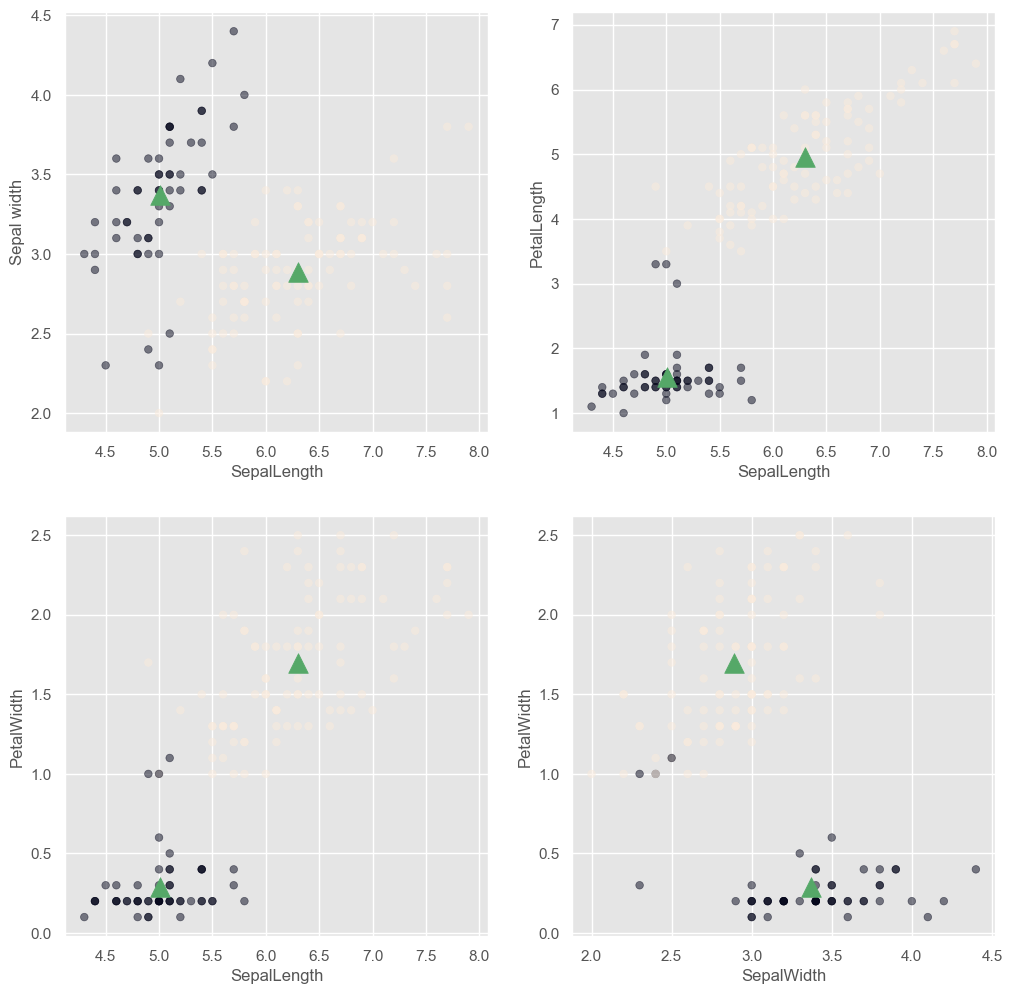

In [8]:
plt.figure(figsize=(12, 12))

ax1=plt.subplot(221)
#puntos
ax1.scatter(dn[:, 0], dn[:, 1], c=labels,alpha=0.5,s=30)
#centroides
ax1.scatter(centroids[0][0],centroids[0][1], c='g',s=200,marker=u'^')
ax1.scatter(centroids[1][0],centroids[1][1], c='g',s=200,marker=u'^')

ax1.set_xlabel('SepalLength')
ax1.set_ylabel('Sepal width')

ax2=plt.subplot(222)
#puntos
ax2.scatter(dn[:, 0], dn[:, 2], c=labels,alpha=0.5,s=30)
#centroides
ax2.scatter(centroids[0][0],centroids[0][2], c='g',s=200,marker=u'^')
ax2.scatter(centroids[1][0],centroids[1][2], c='g',s=200,marker=u'^')

ax2.set_xlabel('SepalLength')
ax2.set_ylabel('PetalLength')

ax3=plt.subplot(223)
#puntos
ax3.scatter(dn[:, 0], dn[:, 3], c=labels,alpha=0.5,s=30)
#centroides
ax3.scatter(centroids[0][0],centroids[0][3], c='g',s=200,marker=u'^')
ax3.scatter(centroids[1][0],centroids[1][3], c='g',s=200,marker=u'^')

ax3.set_xlabel('SepalLength')
ax3.set_ylabel('PetalWidth')

ax4=plt.subplot(224)
#puntos
ax4.scatter(dn[:, 1], dn[:, 3], c=labels,alpha=0.5,s=30)
#centroides
ax4.scatter(centroids[0][1],centroids[0][3], c='g',s=200,marker=u'^')
ax4.scatter(centroids[1][1],centroids[1][3], c='g',s=200,marker=u'^')

ax4.set_xlabel('SepalWidth')
ax4.set_ylabel('PetalWidth')

## 3.4. Evaluando los clusters

Para evaluar los clusters y elegir el mejor K utilizaremos la métrica silhouette score

In [9]:
from sklearn.preprocessing import StandardScaler
X = df.drop('name_num',axis= 1)
ss = StandardScaler()
ss_cluster = ss.fit_transform(X)

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


#X = cluster.drop(['categorization_tier_3','incident_number_count'],axis = 1)

X = df.drop('name_num',axis=1)#,'max_proporcion']]
X = ss.fit_transform(X)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10 , 11, 12, 13 , 14 , 15]

for n_clusters in range_n_clusters:


    # Inicializar el cluster con n_clusters
    # random_state en 10 para hacerlo reproducible
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.5817500491982808
For n_clusters = 3 The average silhouette_score is : 0.4798814508199817
For n_clusters = 4 The average silhouette_score is : 0.3850454053045392
For n_clusters = 5 The average silhouette_score is : 0.34503345350274617
For n_clusters = 6 The average silhouette_score is : 0.3339432304006177
For n_clusters = 7 The average silhouette_score is : 0.2664290993719981
For n_clusters = 8 The average silhouette_score is : 0.34162906041313373
For n_clusters = 9 The average silhouette_score is : 0.32439914389835445
For n_clusters = 10 The average silhouette_score is : 0.33540615043919825
For n_clusters = 11 The average silhouette_score is : 0.3269143492455272
For n_clusters = 12 The average silhouette_score is : 0.34914015854563896
For n_clusters = 13 The average silhouette_score is : 0.3306769486769596
For n_clusters = 14 The average silhouette_score is : 0.31332587245897126
For n_clusters = 15 The average silhouette_score is :

In [11]:
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(ss_cluster.transpose())

principalDf = pd.DataFrame(data = pca.components_ ).transpose()
principalDf.columns = ['pc1','pc2']
principalDf['clase'] = df.name_num
principalDf['cluster'] =  y_kmeans
df['cluster'] = y_kmeans

<Figure size 1500x1500 with 0 Axes>

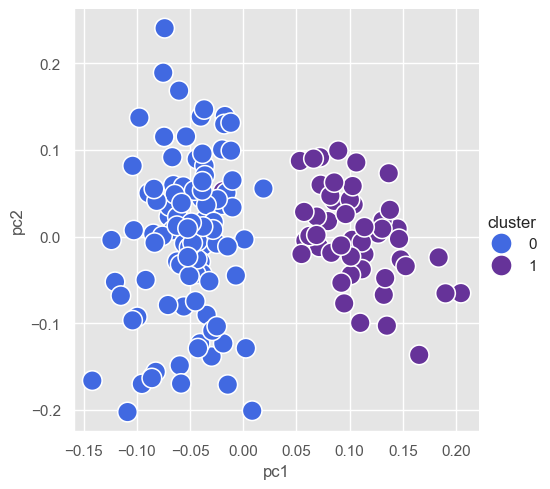

In [13]:
plt.figure(figsize=(15,15))

sns.relplot(x ='pc1',y='pc2', data=principalDf,hue='cluster',palette=['royalblue','rebeccapurple'],s=200)
plt.show()

Reduciendo el dataset a 2 dimensiones utilizando PCA podemos ver que tan bien encontró los grupos el algoritmo K-Means

# DBSCAN

Para implementar DBSCAN primero importamos los paquetes necesarios de `sklearn` y los datos de iris

## Introducción: importando datos

In [14]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [15]:
data = load_iris()

In [16]:
X, y = data.data, data.target

## Desarrollo

### Estandarizamos las variables 

In [17]:
X = StandardScaler().fit_transform(X)

### Generamos los clusters y extraemos las etiquetas

Implementamos `DBSCAN`

In [18]:
dbscn = DBSCAN(eps = 0.8, min_samples = 7).fit(X)

Aquí seteamos un valor de epsilon (`eps`) 0.8 y el mínimo de puntos (`min_samples`) a 7.

Como regla general al elegir el mínimo de pntos, siempre se debería tratar de setear este parámetro en un valor igual o mayor al número de dimensiones en los datos más uno. Epsilon es un poco mpas complejo y usa un método llamado k-distancias, que puede ayudar a visualizar el mejor epsilon. Vamos a ver de qué forma diferentes valores de epsilon afectan los resultados.

In [19]:
core_samples = dbscn.core_sample_indices_
labels = dbscn.labels_  

El algoritmo DBSCAN en `sklearn` devuelve dos elementos:
    
   - `core_samples`: son los índices de puntos alrededor de los que el algoritmo busca para formar los clusters
   - `labels` :las etiquetas
   - `components`: es una copia de los registros del dataset original que coincide con las core samples

#### ¿Cuántos puntos "ruidosos" hay en el dataset?

In [20]:
labels = dbscn.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool) # Generamos un array lleno de 0's del mismo shape que `labels`
core_samples_mask[dbscn.core_sample_indices_] = True # Para aquellos que formen parte de los índices de core sample ponemos True

np.sum(labels == -1)

np.int64(7)

####  ¿Cuántos clusters se generaron?

In [21]:
n_clusters_ = np.unique([l for l in labels if l != -1]).shape[0]
print('Number of clusters: ', n_clusters_)

Number of clusters:  2


## Evaluando la performance de DBSCAN

Podemos usar estos comandos para evaluar la performance de DBSCAN. Una aclaración: como podrán ver, hemos usado las medidas que hemos visto la clase pasada. Pueden investigar muchas otras medidas en la documentación de [Scikit-Learn](http://scikit-learn.org/stable/modules/clustering#clustering-performance-evaluation).

In [22]:
def eval_dbscan(n_clusters, X, y, labels):
    print('Estimated number of clusters: %d' % n_clusters), "\n"
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

In [23]:
eval_dbscan(n_clusters_, X, y, labels)

Estimated number of clusters: 2
Silhouette Coefficient: 0.523


** Ploteamos los resultados **

Graficamos los resultados: la idea es poder visualizar de forma diferenciada los puntos. 

- los colores diferencian los clusters
- en círculos coloreados grandes veremos los "core points"
- en cŕiculos coloreados pequeños, los "reacheable points"
- en círculos pequeños negros, los puntos ruidosos

In [24]:
# Generamos una paleta de colores

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

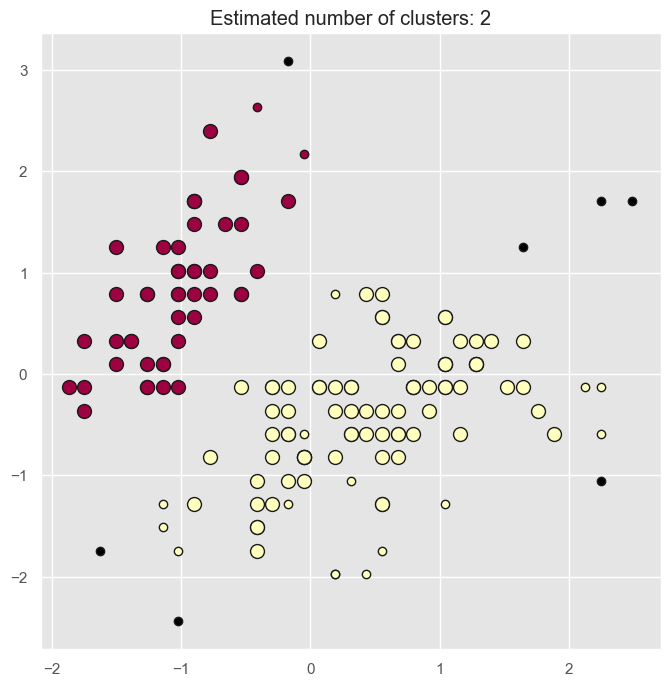

In [25]:
# Iteramos sobre las etiquetas únicas y sobre los colores
#### Si es un caso ruidoso (k=-1) le asigamos el color negro
#### Si no, subseteamos el array con los datos en función de la etiqueta y si es o no un punto núcleo
#### Si es un punto núcleo, lo ploteamos tamaño grande
#### Si NO es un punto núcleo, lo ploteamos tamaño pequeño
#### Los colores representan los clusters

plt.figure(figsize=[8,8])
for k, col in zip(unique_labels, colors):
    if k == -1:         
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()